# 1. Install Dependencies & Setup

- GPU support on native-Windows is only available for 2.10 or earlier versions, starting in TF 2.11, CUDA build is not supported for Windows. For using TensorFlow GPU on Windows, you will need to build/install TensorFlow in WSL2 or use tensorflow-cpu with TensorFlow-DirectML-Plugin

In [ ]:
# !pip install tensorflow-cpu==2.10
# !pip install tensorflow-directml-plugin

In [2]:
# import libraries
import tensorflow as tf
import os

In [3]:
# Restrict tensorflow from using all the memory on the GPU
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
# Check if the GPU is available
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove corrupted files

- We are using an extension called "Download All Images" (Edge/Chrome) and some of the files it downloads from Google Images may not be images at all, so we need to remove them.

In [5]:
# import libraries

import cv2
import imghdr

In [6]:
# create variable to store the path to the dataset
data_dir = 'data'

# create a list to store the image extensions
img_extensions = ['jpg', 'png', 'jpeg', 'bmp']

# main loop to iterate through the folders and filter out the images
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)

        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)

            if tip not in img_extensions:
                print('Image not in correct format: ', image_path)
                os.remove(image_path)
        
        except Exception as e:
            print('Image not readable: ', image_path)

Image not in correct format:  data\happy_people\1282554-kids.webp
Image not in correct format:  data\happy_people\427394C200000578-0-image-a-24_1500384481554.jpg
Image not in correct format:  data\happy_people\Positive-People-1.jpg
Image not in correct format:  data\happy_people\traitshappypeople.jpg
Image not in correct format:  data\sad_people\1cd95b44e0d785987a6596d4baf940fc19-13-sad-white-man.2x.h473.w710.jpg
Image not in correct format:  data\sad_people\african-american-depressive-sad-broken-260nw-475790911.jpg
Image not in correct format:  data\sad_people\depositphotos_210655610-stock-photo-sad-man-sitting-floor-home.jpg
Image not in correct format:  data\sad_people\origin-144.jpg
Image not in correct format:  data\sad_people\sad-person-pictures-2560-x-1707-a8ginomrbkhyh3ri.jpg
Image not in correct format:  data\sad_people\sad-person-pictures-2bnso9uiwlhrikrx.jpg


# 3. Load Data

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Load the documentation and arguments
# tf.keras.utils.image_dataset_from_directory??

In [10]:
# The keras utils helps to resize, preprocess and load the images into the model
data = tf.keras.utils.image_dataset_from_directory('data')

Found 206 files belonging to 2 classes.


In [12]:
# Create a data iterator
data_iterator = data.as_numpy_iterator()
data_iterator

In [17]:
# Create the batch
batch = next(data_iterator)

# Numpy array representation of the batch
print(batch[0].shape)

# Print the labels
print(batch[1])

(32, 256, 256, 3)
[0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0]


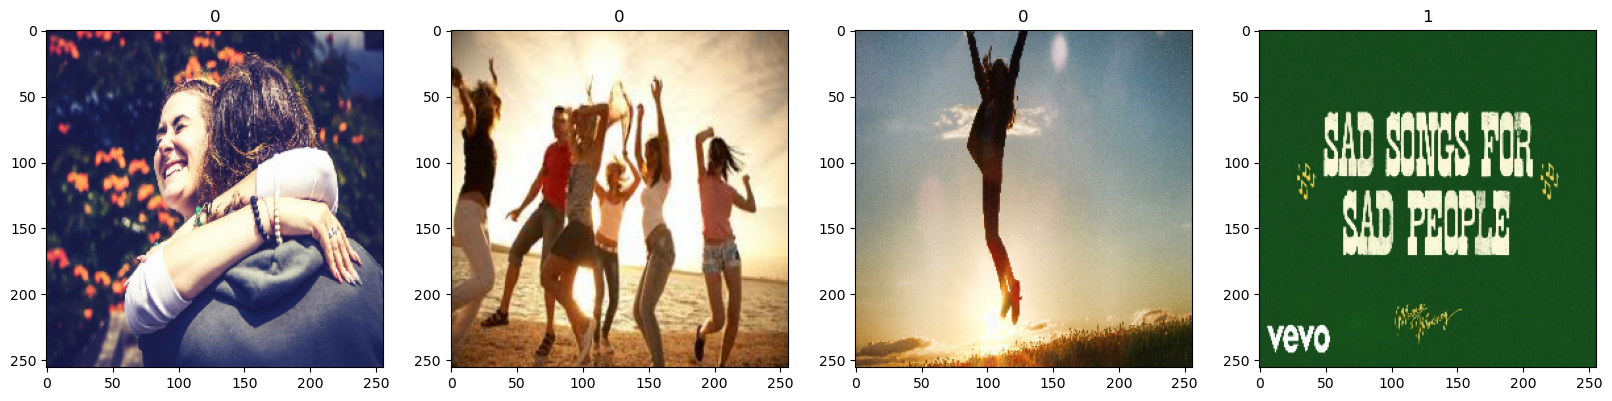

In [18]:
# To determine if 1 is happy or sad
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype('int'))
    ax[idx].title.set_text(batch[1][idx])